In [ ]:
Konteks: Optimasi Kualitas Pengecoran Logam
Kita ingin mengoptimalkan kekuatan tarik (tensile strength) dalam proses pengecoran logam.
Faktor yang diuji:
A: Suhu Peleburan (°C) → (1400, 1450, 1500)
B: Jenis Pasir Cetak → (Silika, Zirkon, Kromit)
C: Waktu Holding (menit) → (10, 15, 20)

Dengan 3 faktor dan 3 level, full factorial membutuhkan  percobaan.
Taguchi mengoptimalkan dengan L9 Orthogonal Array (9 percobaan) untuk efisiensi.

In [1]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Definisi faktor dan levelnya
levels = {
    "A": [1400, 1450, 1500],  # Suhu Peleburan (°C)
    "B": ["Silika", "Zirkon", "Kromit"],  # Jenis Pasir Cetak
    "C": [10, 15, 20]  # Waktu Holding (menit)
}

In [3]:
# 2. L9 Orthogonal Array (Taguchi)
l9_design = [
    [1400, "Silika", 10],
    [1400, "Zirkon", 15],
    [1400, "Kromit", 20],
    [1450, "Silika", 15],
    [1450, "Zirkon", 20],
    [1450, "Kromit", 10],
    [1500, "Silika", 20],
    [1500, "Zirkon", 10],
    [1500, "Kromit", 15],
]

df = pd.DataFrame(l9_design, columns=["A", "B", "C"])

In [4]:
# 3. Simulasikan data response (Tensile Strength dalam MPa)
np.random.seed(42)
df["Tensile_Strength"] = (
    300 + 0.5 * (df["A"] - 1400) + 5 * (df["C"] - 10)
    + np.random.normal(0, 3, len(df))
)

In [5]:
# 4. Analisis ANOVA
model = smf.ols('Tensile_Strength ~ A + C + B', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

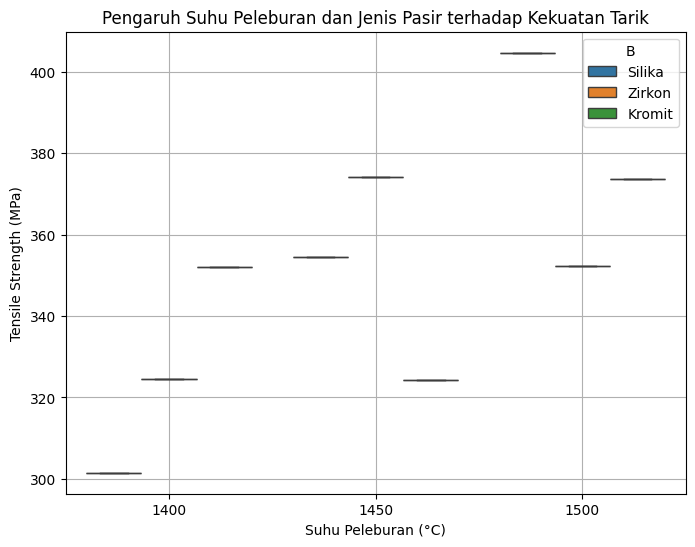

In [6]:
# 5. Visualisasi pengaruh faktor
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="A", y="Tensile_Strength", hue="B")
plt.title("Pengaruh Suhu Peleburan dan Jenis Pasir terhadap Kekuatan Tarik")
plt.xlabel("Suhu Peleburan (°C)")
plt.ylabel("Tensile Strength (MPa)")
plt.grid(True)
plt.show()

In [7]:
# 6. Output hasil
print(df)
print("\nANOVA Table:\n", anova_table)
print("\nModel Summary:\n", model.summary())

      A       B   C  Tensile_Strength
0  1400  Silika  10        301.490142
1  1400  Zirkon  15        324.585207
2  1400  Kromit  20        351.943066
3  1450  Silika  15        354.569090
4  1450  Zirkon  20        374.297540
5  1450  Kromit  10        324.297589
6  1500  Silika  20        404.737638
7  1500  Zirkon  10        352.302304
8  1500  Kromit  15        373.591577

ANOVA Table:
                sum_sq   df           F    PR(>F)
B           23.826722  2.0    2.997513  0.160159
A         3881.793268  1.0  976.695552  0.000006
C         3895.800699  1.0  980.219953  0.000006
Residual    15.897659  4.0         NaN       NaN

Model Summary:
                             OLS Regression Results                            
Dep. Variable:       Tensile_Strength   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     490.7
Date:                Mon, 1

c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
